In [3]:
#data cleanup
import pandas as pd
df_raw = pd.read_csv("Data.csv")

#get basic info. tells us there are no null values
df_raw.info()

#take a sample so that we can see what columns are categories
df_raw.sample(n=5)

#change dtype from object to category
digital_habits = pd.read_csv("Data.csv", dtype = {'gender':'category', 'region':'category', 'income_level':'category', 'daily_role':'category'})

#double check that there truly are no missing values
print(digital_habits.isna().sum())
#yep, no missing values. moving to a new cell.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3500 non-null   int64  
 1   age                       3500 non-null   int64  
 2   gender                    3500 non-null   object 
 3   region                    3500 non-null   object 
 4   income_level              3500 non-null   object 
 5   education_level           3500 non-null   object 
 6   daily_role                3500 non-null   object 
 7   device_hours_per_day      3500 non-null   float64
 8   phone_unlocks             3500 non-null   int64  
 9   notifications_per_day     3500 non-null   int64  
 10  social_media_mins         3500 non-null   int64  
 11  study_mins                3500 non-null   int64  
 12  physical_activity_days    3500 non-null   float64
 13  sleep_hours               3500 non-null   float64
 14  sleep_qu

In [4]:
# Looking for outliers in data and removing them
#import needed libraries & read the file
import pandas as pd
import numpy as np
df = pd.read_csv('Data.csv')

# find numeric columns, non numeric values cannot have outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns found:", numeric_cols)

# create function to find and remove outliers
def remove_outliers_iqr(dataframe, columns, threshold=1.5):
    df_clean = dataframe.copy()
    for col in columns: #first find interquartile range for each column
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # create upper and lower limits
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # git rid of outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# remove outliers from data
df_cleaned = remove_outliers_iqr(df, numeric_cols, threshold=1.5)

print(f"Rows removed: {len(df) - len(df_cleaned)}")
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

# save data cleanup changes
df_cleaned.to_csv('cleaned_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_data.csv'")


Numeric columns found: ['id', 'age', 'device_hours_per_day', 'phone_unlocks', 'notifications_per_day', 'social_media_mins', 'study_mins', 'physical_activity_days', 'sleep_hours', 'sleep_quality', 'anxiety_score', 'depression_score', 'stress_level', 'happiness_score', 'focus_score', 'high_risk_flag', 'productivity_score', 'digital_dependence_score']
Rows removed: 1207
Original shape: (3500, 24)
Cleaned shape: (2293, 24)

Cleaned data saved to 'cleaned_data.csv'


In [5]:
# find min and max for each numeric column with the cleaned data 
print("Minimum & maximum values for each column:")
print("="*50)

for col in df_cleaned.columns:
    if col in numeric_cols:
        min_val = df_cleaned[col].min()
        max_val = df_cleaned[col].max()
        print(f"\n{col}:")
        print(f"  Minimum: {min_val}")
        print(f"  Maximum: {max_val}")

Minimum & maximum values for each column:

id:
  Minimum: 1
  Maximum: 3500

age:
  Minimum: 13
  Maximum: 50

device_hours_per_day:
  Minimum: 0.48
  Maximum: 14.73

phone_unlocks:
  Minimum: 9
  Maximum: 303

notifications_per_day:
  Minimum: 24
  Maximum: 831

social_media_mins:
  Minimum: 0
  Maximum: 408

study_mins:
  Minimum: 0
  Maximum: 343

physical_activity_days:
  Minimum: 0.0
  Maximum: 7.0

sleep_hours:
  Minimum: 4.085625403545603
  Maximum: 10.733192741807692

sleep_quality:
  Minimum: 1.0
  Maximum: 5.0

anxiety_score:
  Minimum: 0.0
  Maximum: 15.41995019922936

depression_score:
  Minimum: 0.0
  Maximum: 21.0

stress_level:
  Minimum: 1.0
  Maximum: 10.0

happiness_score:
  Minimum: 0.0
  Maximum: 10.0

focus_score:
  Minimum: 0.0
  Maximum: 100.0

high_risk_flag:
  Minimum: 0
  Maximum: 0

productivity_score:
  Minimum: 41.0
  Maximum: 89.0

digital_dependence_score:
  Minimum: 5.6
  Maximum: 60.1


<function matplotlib.pyplot.show(close=None, block=None)>

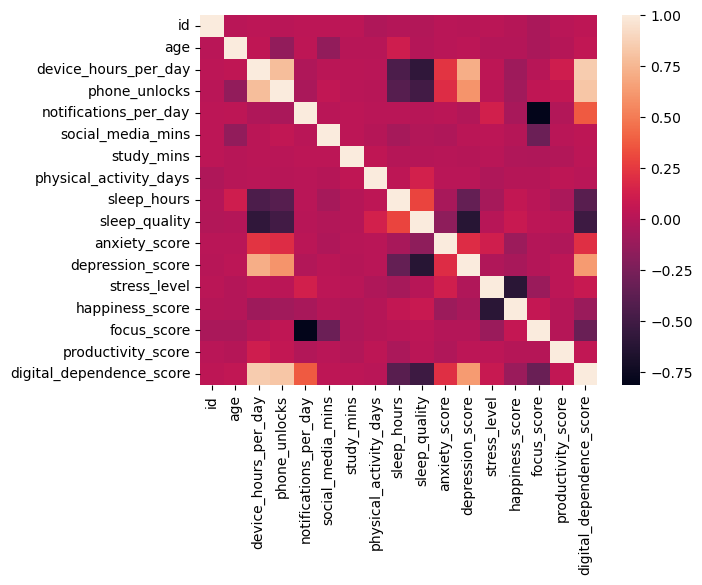

In [6]:
#let's look at overall correlation real quick
numeric_cols.remove('high_risk_flag')
corr = df_cleaned[numeric_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr)
plt.show

In [7]:
#wow, this actually shows a lot about our data. as phoone unlocks and device hours per day increases, sleep quality and sleep hours both decrease. 
#as notifications per day increases, focus score decreases. but also, as sleep quality and hours decrease, depression increases. 
#the same negative correlation is found between stress and happiness, which makes sense. let's dive into some other details

#initialize screen time bins for ranges for data analysis
df_cleaned['screentime_bucket'] = pd.cut(df_cleaned['device_hours_per_day'], bins=[0, 3, 6, 9, float("inf")], labels = ["0-3", "3-6", "6-9", "9+"], right = False) 


#given men and women of the same screentime range, is either gender more prone to mental illness?
men_vs_women = df_cleaned.groupby(['gender', 'screentime_bucket'], observed=False).agg({'anxiety_score':'mean', 'depression_score':'mean', 'stress_level':'mean'})
print(men_vs_women)

#this shows us that there is no obvious corelation between gender and depression or stress, but there is a potential correlation between gender and anxiety. let's graph this.


                          anxiety_score  depression_score  stress_level
gender screentime_bucket                                               
Female 0-3                     7.860873          1.818182      5.368170
       3-6                     6.423308          4.741667      4.068182
       6-9                     6.699682          8.670259      4.592149
       9+                      9.444724         13.082353      4.551098
Male   0-3                     5.303797          2.405063      4.030725
       3-6                     3.954545          4.636364      4.378329
       6-9                     3.708779          8.719486      4.240631
       9+                      6.900000         12.981250      4.510100


<function matplotlib.pyplot.show(close=None, block=None)>

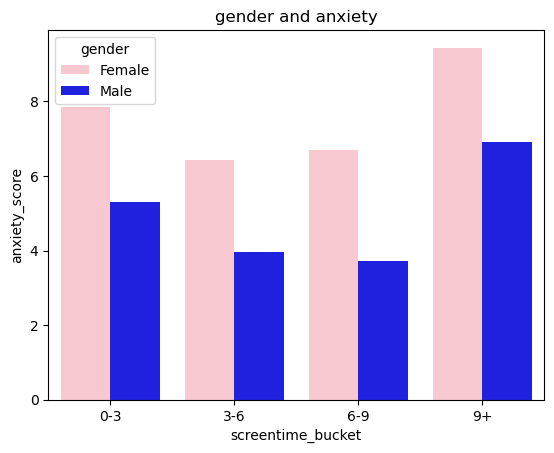

In [8]:
#gender and anxiety
sns.barplot(men_vs_women, x = 'screentime_bucket', y = 'anxiety_score', orient = 'v', hue = 'gender', palette = ['pink', 'blue'])
plt.title('gender and anxiety')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

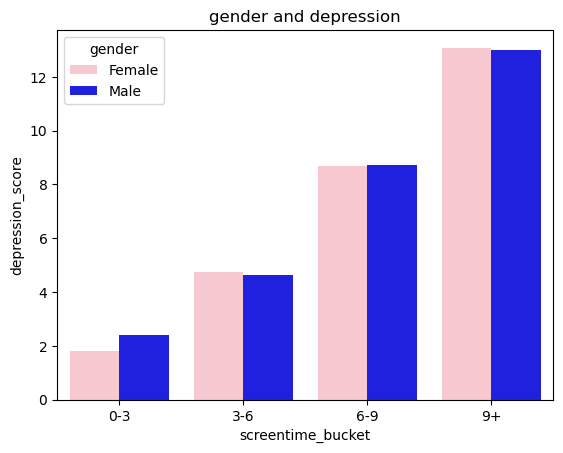

In [9]:
#gender and depression
sns.barplot(men_vs_women, x = 'screentime_bucket', y = 'depression_score', orient = 'v', hue = 'gender', palette = ['pink', 'blue'])
plt.title('gender and depression')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

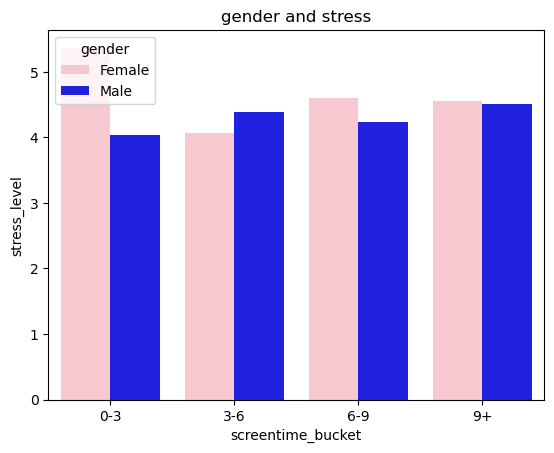

In [10]:
#gender and stress
sns.barplot(men_vs_women, x = 'screentime_bucket', y = 'stress_level', orient = 'v', hue = 'gender', palette = ['pink', 'blue'])
plt.title('gender and stress')
plt.show

In [11]:
#let's do this same thing with education level

#given men and women of the same screentime range, is either gender more prone to mental illness?
education_level = df_cleaned.groupby(['education_level', 'screentime_bucket'], observed=False).agg({'anxiety_score':'mean', 'depression_score':'mean', 'stress_level':'mean'})
print(education_level)

                                   anxiety_score  depression_score  \
education_level screentime_bucket                                    
Bachelor        0-3                     5.887635          1.875000   
                3-6                     5.162011          4.534606   
                6-9                     5.214716          8.867612   
                9+                      8.195724         12.708029   
High School     0-3                     6.634054          2.489362   
                3-6                     5.369919          4.925267   
                6-9                     5.146054          8.650350   
                9+                      8.476621         13.289720   
Master          0-3                     6.738603          2.137931   
                3-6                     5.504837          4.630303   
                6-9                     5.294475          8.573964   
                9+                      7.930803         13.017241   
PhD             0-3 

<function matplotlib.pyplot.show(close=None, block=None)>

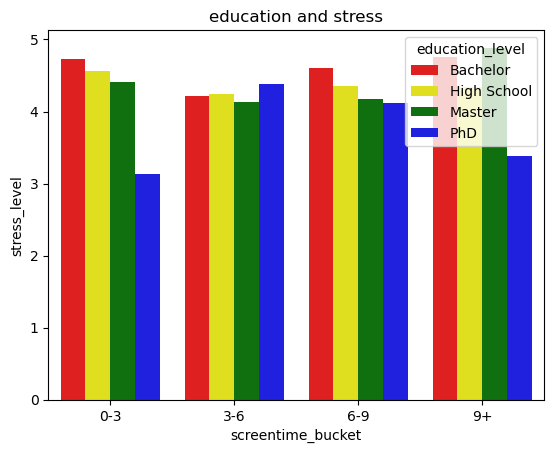

In [12]:
#this is pretty hard to read... let's graph it

sns.barplot(education_level, x = 'screentime_bucket', y = 'stress_level', orient = 'v', hue = 'education_level', palette = ['red', 'yellow', 'green', 'blue'])
plt.title('education and stress')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

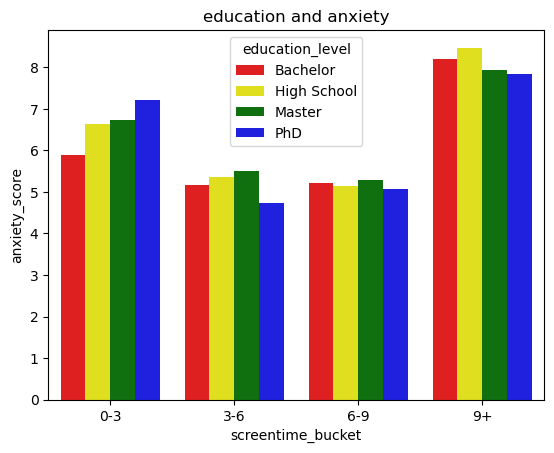

In [13]:
#anxiety?

sns.barplot(education_level, x = 'screentime_bucket', y = 'anxiety_score', orient = 'v', hue = 'education_level', palette = ['red', 'yellow', 'green', 'blue'])
plt.title('education and anxiety')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

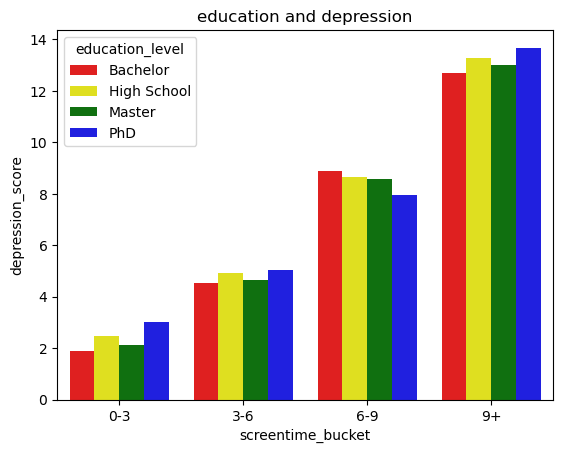

In [14]:
#depression?

sns.barplot(education_level, x = 'screentime_bucket', y = 'depression_score', orient = 'v', hue = 'education_level', palette = ['red', 'yellow', 'green', 'blue'])
plt.title('education and depression')
plt.show

In [15]:
#let's look at age now
df_cleaned['age_bucket'] = pd.cut(df_cleaned['age'], bins=[13, 18, 25, 30, 40, 50, float("inf")], labels = ["teenager", "college-aged", "25-30", "30-40", "40-50", "50+"], right = False)

age_and_screentime = df_cleaned.groupby(['age_bucket', 'screentime_bucket'], observed=False).agg({'anxiety_score':'mean', 'depression_score':'mean', 'stress_level':'mean'})
print(age_and_screentime)

                                anxiety_score  depression_score  stress_level
age_bucket   screentime_bucket                                               
teenager     0-3                     6.789163          2.250000      4.670185
             3-6                     5.293823          4.983051      4.729333
             6-9                     4.985934          9.026786      4.330678
             9+                      8.240900         12.456522      4.216065
college-aged 0-3                     6.156930          2.116279      4.547166
             3-6                     5.354776          4.479853      4.088047
             6-9                     4.985426          8.671875      4.599516
             9+                      8.115472         13.023256      5.071195
25-30        0-3                     6.904016          2.320000      4.704151
             3-6                     5.352535          4.686747      4.016276
             6-9                     5.377689          8.609756 

<function matplotlib.pyplot.show(close=None, block=None)>

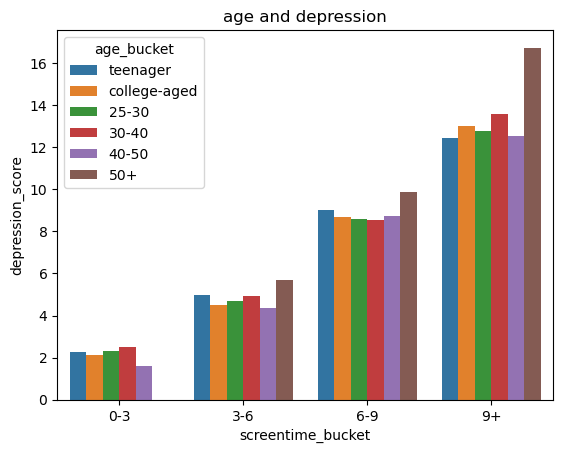

In [16]:
#age and depression
sns.barplot(age_and_screentime, x = 'screentime_bucket', y = 'depression_score', orient = 'v', hue = 'age_bucket')
plt.title('age and depression')
plt.show

#interesting. the 50+ population reports higher depression scores regardless of screentime bucket

<function matplotlib.pyplot.show(close=None, block=None)>

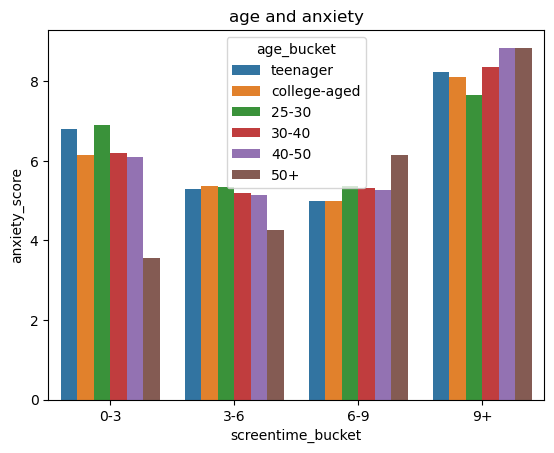

In [17]:
#age and anxiety
sns.barplot(age_and_screentime, x = 'screentime_bucket', y = 'anxiety_score', orient = 'v', hue = 'age_bucket')
plt.title('age and anxiety')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

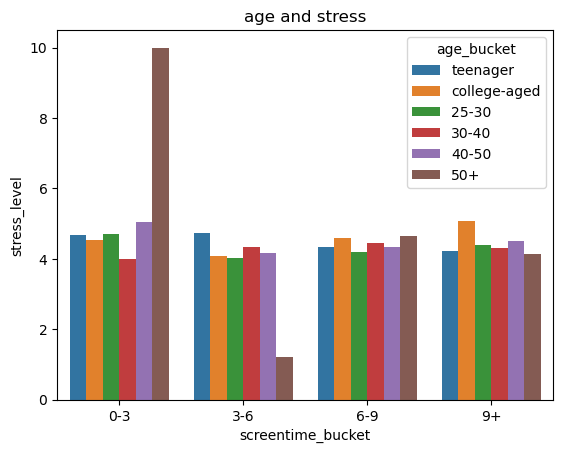

In [18]:
#age and stress
sns.barplot(age_and_screentime, x = 'screentime_bucket', y = 'stress_level', orient = 'v', hue = 'age_bucket')
plt.title('age and stress')
plt.show

In [19]:
#we want to look at the affect of studying on anxiety and depression

#we'll use qcut for binning for this to even out the spread with standard 4 quantiles
df_cleaned['study_bucket'] = pd.qcut(df_cleaned['study_mins'], 4)

digital_study_effects = df_cleaned.groupby(['study_bucket'], observed=False).agg({'anxiety_score':'mean', 'depression_score':'mean', 'stress_level':'mean'})
print(digital_study_effects)

                anxiety_score  depression_score  stress_level
study_bucket                                                 
(-0.001, 42.0]       5.692313          7.351820      4.295699
(42.0, 102.0]        5.830752          7.484848      4.371603
(102.0, 163.0]       5.610324          7.247292      4.379352
(163.0, 343.0]       5.777713          7.389085      4.403995


In [20]:
#this seems like there is little to no variation across the study buckets, 
#which is very interesting to me, because that was the opposite of my hypothesis. let's move on

In [22]:
#no need for bins on this one. let's look at stress level as related to income level
stress_and_income = df_cleaned.groupby(['income_level'], observed=False).agg({'stress_level':'mean'})
print(stress_and_income)

              stress_level
income_level              
High              4.679962
Low               4.352273
Lower-Mid         4.259481
Upper-Mid         4.323180


In [ ]:
#litte to no variation. nothing to explore here.

In [24]:
#now, we want to see if happiness is lower the larger social media mins are

df_cleaned['social_bucket'] = pd.qcut(df_cleaned['social_media_mins'], 4)

social_media_and_happiness = df_cleaned.groupby(['social_bucket'], observed=False).agg({'happiness_score':'mean', 'depression_score':'mean'})
print(social_media_and_happiness)

                happiness_score  depression_score
social_bucket                                    
(-0.001, 65.0]         6.996329          7.306368
(65.0, 111.0]          6.915356          7.457391
(111.0, 178.0]         7.069228          7.336842
(178.0, 408.0]         6.967007          7.380952


In [ ]:
#no variation on happiness score or depression score. this is odd...

In [36]:
#is anxiety higher in people with lower happiness scores?
df_cleaned['happiness_bucket'] = pd.qcut(df_cleaned['happiness_score'], 4)

anxiety_and_happiness = df_cleaned.groupby(['happiness_bucket'], observed=False).agg({'anxiety_score':'mean'}).reset_index()
print(anxiety_and_happiness)

  happiness_bucket  anxiety_score
0    (-0.001, 5.6]       6.111900
1       (5.6, 8.1]       6.224793
2       (8.1, 9.1]       5.498732
3      (9.1, 10.0]       5.039853


<function matplotlib.pyplot.show(close=None, block=None)>

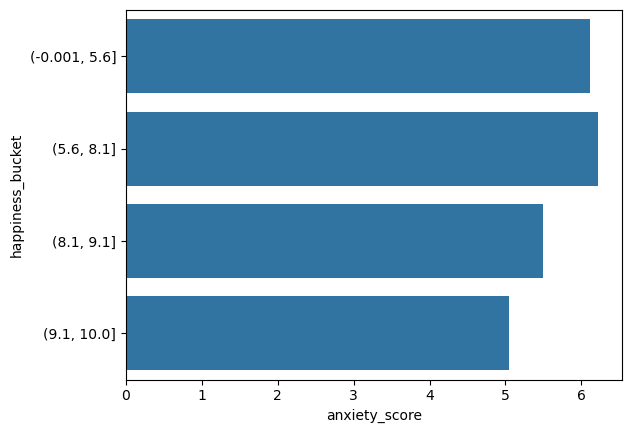

In [58]:
#there is a correlation in this one. let's graph it
sns.barplot(data = anxiety_and_happiness, y = 'happiness_bucket', x = 'anxiety_score')
plt.show

In [42]:
#do people who use screens less focus better?
screens_and_focus = df_cleaned.groupby('screentime_bucket', observed = False).agg({'focus_score':'mean'})
print(screens_and_focus)

                   focus_score
screentime_bucket             
0-3                  46.095491
3-6                  46.438063
6-9                  46.260541
9+                   46.694516


In [43]:
#this doesn't seem to suggest a correlation. what about social media?
focus_and_social = df_cleaned.groupby('social_bucket', observed = False).agg({'focus_score':'mean'})
print(focus_and_social)

                focus_score
social_bucket              
(-0.001, 65.0]    53.121488
(65.0, 111.0]     50.282058
(111.0, 178.0]    46.022412
(178.0, 408.0]    35.886045


<function matplotlib.pyplot.show(close=None, block=None)>

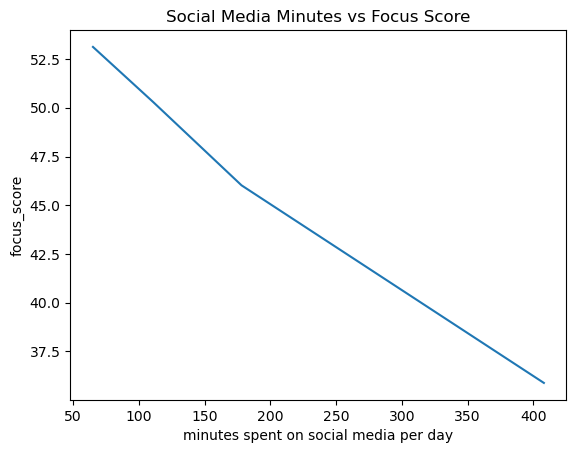

In [48]:
#okay so this does suggest a correlation. let's graph it.
upper_ends = [65, 111, 178, 408]

sns.lineplot(data = focus_and_social, x = upper_ends, y = 'focus_score')
plt.xlabel('minutes spent on social media per day')
plt.title('Social Media Minutes vs Focus Score')
plt.show

In [ ]:
#we had wondered what the social media and screen time habits of those with the high risk flag were, 
#but no observations in this dataset had the high risk flag

In [49]:
#does focus level change according to device type?
device_and_focus = df_cleaned.groupby('device_type', observed = False).agg({'focus_score':'mean'})
print(device_and_focus)

             focus_score
device_type             
Android        47.329022
Laptop         46.610184
Tablet         46.045131
iPhone         45.443009


In [ ]:
#these are too close to draw any kind of conclusion

In [52]:
#does stress level increase with number of notifications?
df_cleaned['notification_bucket'] = pd.qcut(df_cleaned['notifications_per_day'], 10)

stress_and_notifications = df_cleaned.groupby(['notification_bucket'], observed=False).agg({'stress_level':'mean'})
print(stress_and_notifications)

                     stress_level
notification_bucket              
(23.999, 105.0]          4.210912
(105.0, 145.0]           3.474116
(145.0, 181.0]           3.997581
(181.0, 217.8]           4.343274
(217.8, 258.0]           4.547530
(258.0, 292.0]           4.155135
(292.0, 355.4]           4.333030
(355.4, 436.0]           4.460250
(436.0, 539.8]           4.841103
(539.8, 831.0]           5.250473


<function matplotlib.pyplot.show(close=None, block=None)>

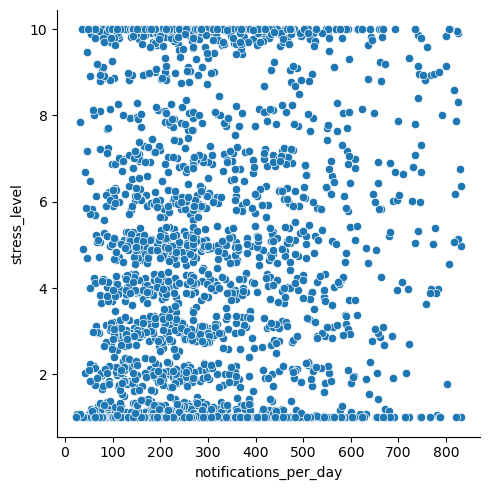

In [56]:
#i'm gonna try graphing this without a grouping...
sns.relplot(data = df_cleaned, x = 'notifications_per_day', y = 'stress_level')
plt.show

#lol this is hilarious you can't see anything

<function matplotlib.pyplot.show(close=None, block=None)>

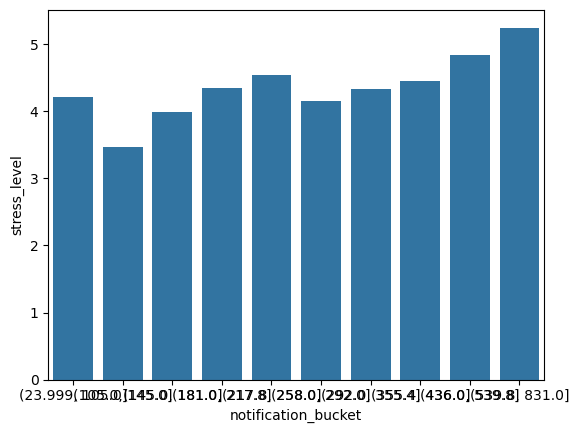

In [60]:
sns.barplot(data = stress_and_notifications, y = 'stress_level', x = 'notification_bucket')
plt.show

In [ ]:
#this was the end of what we had planned. can look more explicitly at affects on sleep or overall affects on mental health

In [23]:
df_cleaned.sample(n=10)

,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score,screentime_bucket,age_bucket,study_bucket
896,897,24,Female,South America,Low,Bachelor,Student,4.59,107,632,...,1.882007,9.1,10.0000,0,Tablet,63.0,34.0,3-6,college-aged,"(-0.001, 42.0]"
682,683,27,Male,North America,Upper-Mid,High School,Student,6.54,156,419,...,7.218865,9.4,21.0000,0,Android,60.0,37.8,6-9,25-30,"(42.0, 102.0]"
1300,1301,26,Female,North America,Upper-Mid,High School,Full-time Employee,6.03,118,529,...,2.842790,7.5,11.0000,0,iPhone,58.0,36.1,6-9,25-30,"(163.0, 343.0]"
1234,1235,16,Female,North America,Low,High School,Student,7.43,137,312,...,8.999300,9.8,45.0000,0,iPhone,57.0,34.6,6-9,teenager,"(-0.001, 42.0]"
1507,1508,33,Female,Europe,Low,Bachelor,Full-time Employee,8.88,133,65,...,6.123018,9.0,41.5986,0,Tablet,75.0,32.4,6-9,30-40,"(42.0, 102.0]"
110,111,17,Female,Asia,Low,High School,Part-time/Shift,2.88,56,158,...,4.867763,8.4,57.0000,0,Tablet,46.0,13.4,0-3,teenager,"(102.0, 163.0]"
1712,1713,40,Male,Asia,High,Bachelor,Unemployed_Looking,7.62,213,92,...,1.048503,9.9,85.0000,0,Laptop,43.0,38.5,6-9,40-50,"(163.0, 343.0]"
2268,2269,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.85,197,248,...,1.000000,8.9,51.0000,0,Tablet,60.0,42.7,6-9,30-40,"(-0.001, 42.0]"
2548,2549,49,Male,Europe,Lower-Mid,Bachelor,Unemployed_Looking,7.99,188,255,...,8.368495,5.7,34.0000,0,Tablet,75.0,41.3,6-9,40-50,"(163.0, 343.0]"
3432,3433,19,Female,Europe,Low,Bachelor,Student,3.85,141,264,...,5.190707,9.9,52.0000,0,Tablet,70.0,25.1,3-6,college-aged,"(42.0, 102.0]"
